In [7]:
import numpy as np
import matplotlib.pyplot as plt


# Parameters
m = 1
v = 10
N_part = 625
m_disk = 10
R_disk = 10
L = 260
sigma = 1
epsilon = 1
T_tot = 400
dt = 0.005
trajectory = []
msd_list = []


# Initialize disk
disk = {'x': L / 2, 'y': L / 2, 'vx': 0, 'vy': 0}


# Initialize particles on a grid
particles = []

for i in range(int(np.sqrt(N_part))):
    for j in range(int(np.sqrt(N_part))):
        x = i * L / np.sqrt(N_part) + L / (2 * np.sqrt(N_part))
        y = j * L / np.sqrt(N_part) + L / (2 * np.sqrt(N_part))
        angle = np.random.uniform(0, 2 * np.pi)
        vx = v * np.cos(angle)
        vy = v * np.sin(angle)
        particle = {'x': x, 'y': y, 'vx': vx, 'vy': vy}
        particles.append(particle)
      

# Remove particles within the disk radius plus 3*sigma
particles = [p for p in particles if np.sqrt((p['x'] - disk['x']) ** 2 + (p['y'] - disk['y']) ** 2) > (R_disk + 3 * sigma)]




# Lennard-Jones force calculation
def lennard_jones_force(disk, particle):
    dx = disk['x'] - particle['x']
    dy = disk['y'] - particle['y']
    r = np.sqrt(dx ** 2 + dy ** 2) - R_disk
    if r < 3 * sigma:
        F = 24 * epsilon * ((2 * (sigma / r) ** 12) - (sigma / r) ** 6) / r
        fx = F * dx / r
        fy = F * dy / r
        return fx, fy
    return 0, 0


trajectory = []
msd_list = []
time_steps = int(T_tot / dt)


# Main loop with Tkinter refresh
step = 0
running = True
tot_msd = []

while running and step < time_steps:
    # Record disk's position for trajectory and MSD calculation
    trajectory.append((disk['x'], disk['y']))

    # # Calculate MSD at each step
    # if step > 0:
    #     prev_x, prev_y = trajectory[step-1]
    #     curr_x, curr_y = trajectory[step]
    #     temp = (curr_x -prev_x ) ** 2 + (curr_y - prev_x) ** 2
    #     tot_msd.append(temp)
    #     #DEBUG 
    #     #print(f'len of tot_msd = {len(tot_msd)}')
        

    # Update disk position
    disk_fx, disk_fy = 0, 0
    for i, particle in enumerate(particles):
        fx, fy = lennard_jones_force(disk, particle)
        disk_fx += fx
        disk_fy += fy
        particle['vx'] += -fx / m * dt
        particle['vy'] += -fy / m * dt
        particle['x'] += particle['vx'] * dt
        particle['y'] += particle['vy'] * dt

        # Boundary conditions for particles (reflecting)
        if particle['x'] <= 0 or particle['x'] >= L:
            particle['vx'] *= -1
        if particle['y'] <= 0 or particle['y'] >= L:
            particle['vy'] *= -1


    # Update disk velocity and position based on net force
    disk['vx'] += disk_fx / m_disk * dt
    disk['vy'] += disk_fy / m_disk * dt
    disk['x'] += disk['vx'] * dt
    disk['y'] += disk['vy'] * dt

    # Boundary conditions for the disk (reflecting)
    if disk['x'] <= R_disk or disk['x'] >= L - R_disk:
        disk['vx'] *= -1
    if disk['y'] <= R_disk or disk['y'] >= L - R_disk:
        disk['vy'] *= -1


    # msd = np.average(tot_msd)
    # msd_list.append(msd)

    # DEBUG 
    if step % 3000 == 0:
        print(f'Time step: {step}, Disk position: ({disk["x"]}, {disk["y"]})')
        
    
   
    step += 1









Time step: 0, Disk position: (130.0, 130.0)
len of tot_msd = 0, step = 0, msd = 511.7274551736864
Time step: 3000, Disk position: (130.98816602307747, 120.22445464482269)
len of tot_msd = 0, step = 3000, msd = 511.7274551736864
Time step: 6000, Disk position: (131.48388948940757, 124.98955743988391)
len of tot_msd = 0, step = 6000, msd = 511.7274551736864
Time step: 9000, Disk position: (131.29025092354667, 124.84307619216999)
len of tot_msd = 0, step = 9000, msd = 511.7274551736864
Time step: 12000, Disk position: (136.81363553497408, 115.13706041129609)
len of tot_msd = 0, step = 12000, msd = 511.7274551736864
Time step: 15000, Disk position: (126.49778534938076, 134.7932763347635)
len of tot_msd = 0, step = 15000, msd = 511.7274551736864
Time step: 18000, Disk position: (135.04734832502066, 121.31108432367814)
len of tot_msd = 0, step = 18000, msd = 511.7274551736864
Time step: 21000, Disk position: (142.43852549177672, 128.43744232503207)
len of tot_msd = 0, step = 21000, msd = 511

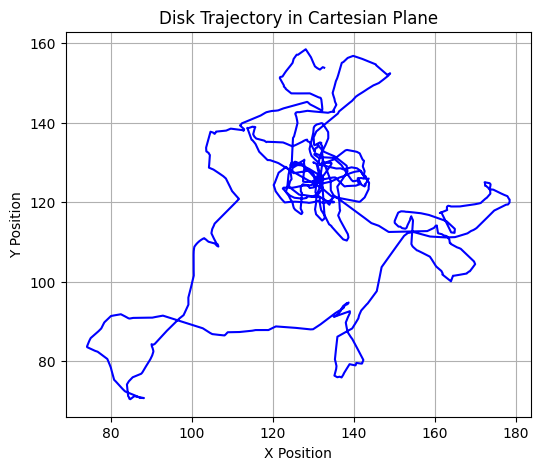

In [10]:

# Plot trajectory and MSD
def plot_results():
    # Plot disk's trajectory
    trajectory_x, trajectory_y = zip(*trajectory)
    plt.figure(figsize=(6, 5))  # 创建单独的图窗口
    plt.plot(trajectory_x, trajectory_y, color='blue')
    plt.xlabel("X Position")
    plt.ylabel("Y Position")
    plt.title("Disk Trajectory in Cartesian Plane")
    plt.grid(True)
    plt.savefig( 'disk_trajectory.png') 
    plt.show()
    plt.pause(1)
    plt.close() 



plot_results()


In [ ]:
msd_list = []
dt = 0.005  # 时间步长
N = len(trajectory)  # 总记录位置数（时间步数）

for n in range(1, N):

    trajectory_array = np.array(trajectory)  # transfer to  NumPy 
    displacements = trajectory_array[n:] - trajectory_array[:-n]  
    squared_displacements = np.sum(displacements**2, axis=1)  # dx^2 + dy^2
    msd_n = np.mean(squared_displacements)  
    msd_list.append(msd_n)
    if n % 1000 ==0 :
        print(f'n = {n} , msd_n ={msd_n}')


n = 1000 , msd_n =114.16897516002602
n = 2000 , msd_n =298.8105145742471
n = 3000 , msd_n =484.4054045370685
n = 4000 , msd_n =658.983741329516
n = 5000 , msd_n =806.5383966862754
n = 6000 , msd_n =935.1975754595651
n = 7000 , msd_n =1045.0720225606651
n = 8000 , msd_n =1161.4359889465454
n = 9000 , msd_n =1291.2906311386205
n = 10000 , msd_n =1461.5307847248434
n = 11000 , msd_n =1636.757763406204
n = 12000 , msd_n =1732.8115149112189
n = 13000 , msd_n =1770.4108659641913
n = 14000 , msd_n =1798.7520487634838
n = 15000 , msd_n =1814.4256331648799
n = 16000 , msd_n =1854.933632239499
n = 17000 , msd_n =1926.509775378315
n = 18000 , msd_n =1988.295637236557
n = 19000 , msd_n =2026.5164293330024
n = 20000 , msd_n =2018.7591442694395
n = 21000 , msd_n =1966.0807433084278
n = 22000 , msd_n =1887.0194131274645
n = 23000 , msd_n =1818.9608334852883
n = 24000 , msd_n =1806.6626603780383
n = 25000 , msd_n =1822.872959105497
n = 26000 , msd_n =1839.7845114092695
n = 27000 , msd_n =1857.59097783

Estimated diffusion coefficient D: -0.1378108885793087


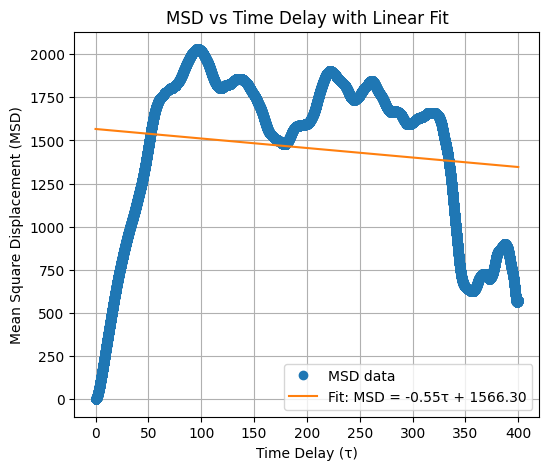

In [28]:

# 创建对应于每个 MSD 值的 time_delays 数组
time_delays = np.arange(1, N) * dt

linear_region_start = 0  
slope, intercept = np.polyfit(time_delays[linear_region_start:], msd_list[linear_region_start:], 1)
D = slope / 4
print(f"Estimated diffusion coefficient D: {D}")

# 绘制 MSD 和线性拟合
plt.figure(figsize=(6, 5))
plt.plot(time_delays, msd_list, 'o', label='MSD data')
plt.plot(time_delays[linear_region_start: ], slope * time_delays[linear_region_start: ] + intercept, '-', label=f'Fit: MSD = {slope:.2f}τ + {intercept:.2f}')
plt.xlabel("Time Delay (τ)")
plt.ylabel("Mean Square Displacement (MSD)")
plt.title("MSD vs Time Delay with Linear Fit")
plt.legend()
plt.grid(True)
plt.savefig('msd_with_fit.png')
plt.show()

D = -1.4506223690801414


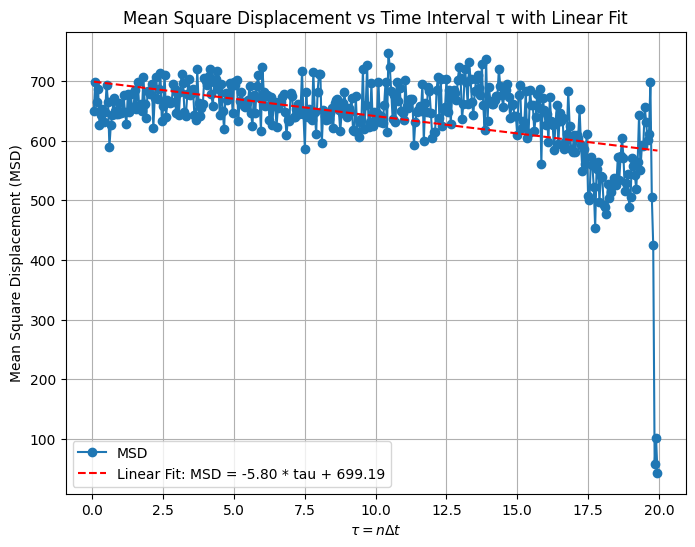

In [11]:

import numpy as np
import matplotlib.pyplot as plt
def mean_square_displacement(trajectory, delta_t):
   
    
    N = len(trajectory)  # 时间步总数
    msd_values = []  # 存储每个时间间隔的 MSD 值

    # 遍历每一个位移时间步 n
    for n in range(1, N):
        displacements = []  # 用来存储所有位移平方

        # 对每个位置对 (i, i+n) 计算位移平方
        for i in range(N - n):
            dx = trajectory[i + n][0] - trajectory[i][0]  # x 方向的位移
            dy = trajectory[i + n][1] - trajectory[i][1]  # y 方向的位移
            displacement_squared = dx ** 2 + dy ** 2  # 位移平方
            displacements.append(displacement_squared)  # 添加到列表

        # 计算所有位移平方的平均值
        msd_n = np.mean(displacements)  # 当前时间间隔 n 的均方位移
        msd_values.append((n * delta_t, msd_n))  # 将 (tau, MSD) 添加到结果中

    return msd_values  # 返回每个时间间隔的 (tau, MSD) 值


np.random.seed(0)
N = 400  # 时间步数  
dt =0.05
trajectory = [(np.cumsum(np.random.randn(N))[i], np.cumsum(np.random.randn(N))[i]) for i in range(N)]

msd_values = mean_square_displacement(trajectory, dt)


taus = np.array([tau for tau, msd in msd_values], dtype=np.float64)
msd = np.array([msd for tau, msd in msd_values], dtype=np.float64)

slope, intercept = np.polyfit(taus, msd, 1)  # 1 表示线性拟合（一次多项式）

print(f'D = {slope/4}')

plt.figure(figsize=(8, 6))
plt.plot(taus, msd, marker='o', linestyle='-', label="MSD")
plt.plot(taus, slope * taus + intercept, linestyle='--', color='red', label=f"Linear Fit: MSD = {slope:.2f} * tau + {intercept:.2f}")
plt.xlabel(r"$\tau = n \Delta t$")  # 使用 LaTeX 格式显示 tau = n∆t
plt.ylabel("Mean Square Displacement (MSD)")
plt.title("Mean Square Displacement vs Time Interval τ with Linear Fit")
plt.legend()
plt.grid(True)
plt.show()